In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [ ]:
# Load the CSV Data
data_handlebar_acc_one= pd.read_csv('../data/handlebar/Accelerometer_data_merged_ESP1.csv')  # Load the CSV data using pandas


In [ ]:
#Convert 'NTP' to Datetime and Set as Index
# data_handlebar_acc_one['NTP'] = pd.to_datetime(data_handlebar_acc_one['NTP'])
# data_handlebar_acc_one.set_index('NTP', inplace=True)
# data_handlebar_acc_two['NTP'] = pd.to_datetime(data_handlebar_acc_two['NTP'])
# data_handlebar_acc_two.set_index('NTP', inplace=True)

In [ ]:
# features = ['curb_activity', 'curb_scene', 'curb_height_down', 
#             'curb_height_up', 'curb_type_down', 'curb_type_up', 'roughness']

# for feature in features:
#     print(f"Value counts for {feature}:")
#     print(data_handlebar_acc_one[feature].value_counts())
#     print()
#     # Plotting the value counts as a bar chart
#     data_handlebar_acc_one[feature].value_counts().plot(kind='bar', title=f"Value counts for {feature}")
#     plt.xlabel(feature)
#     plt.ylabel("Count")
#     plt.show()



Feature counts for curb_scene one:
curb_scene
0.0    530463
1.0     18772
Name: count, dtype: int64


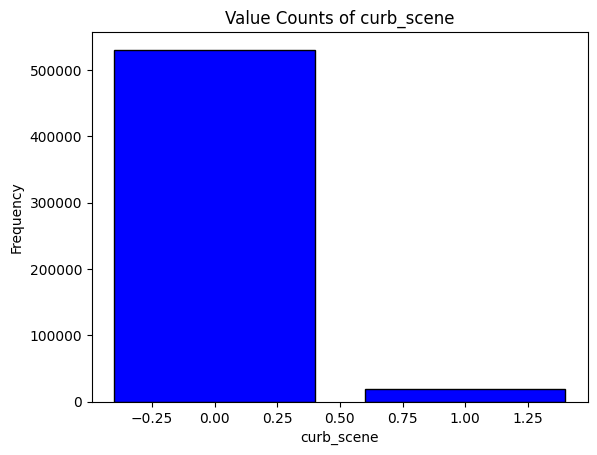

In [ ]:
# Print unique values and their counts
counts = data_handlebar_acc_one['curb_scene'].value_counts()
print("\nFeature counts for curb_scene one:")
print(counts)

# Plot the counts as a bar chart
#plt.figure(figsize=(8, 4))
plt.bar(counts.index, counts.values, color='blue', edgecolor='black')
plt.xlabel('curb_scene')
plt.ylabel('Frequency')
plt.title('Value Counts of curb_scene')
plt.show()


In [ ]:
#Missing Values
missing_rows_one = data_handlebar_acc_one[data_handlebar_acc_one.isnull().any(axis=1)]
#This checks each row for missing values. If any value in a row is True (meaning there's a missing value), .any(axis=1) returns True for that row.
missing_rows_one



,Unnamed: 0,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
21827,21827,NaN,NaN,NaN,NaN,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
21832,21832,NaN,NaN,NaN,NaN,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
21855,21855,NaN,NaN,NaN,NaN,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
21860,21860,NaN,NaN,NaN,NaN,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
21877,21877,NaN,NaN,NaN,NaN,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535201,535201,NaN,NaN,NaN,NaN,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0
535214,535214,NaN,NaN,NaN,NaN,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0
535221,535221,NaN,NaN,NaN,NaN,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0
535234,535234,NaN,NaN,NaN,NaN,1.721819e+12,0.0,1.0,3.0,1.0,2.0,1.0,0.0


In [ ]:
missing_values_one_sum = data_handlebar_acc_one.isnull().sum()
print(missing_values_one_sum)


Unnamed: 0             0
NTP                 2020
Acc-X               2020
Acc-Y               2020
Acc-Z               2020
Timestamp_unix         0
curb_activity          0
curb_scene             0
curb_height_down       0
curb_height_up         0
curb_type_down         0
curb_type_up           0
roughness              0
dtype: int64


In [ ]:
#Show Acc-X,Y,Z if there is a value
plt.figure(figsize=(14, 7), dpi=300)
plt.title('Handlebar accelerometer data')
plt.plot(data_handlebar_acc_one.index, data_handlebar_acc_one['Acc-X'], label='Acc-X', zorder = 3)
plt.plot(data_handlebar_acc_one.index, data_handlebar_acc_one['Acc-Y'], label='Acc-Y', zorder = 2)
plt.plot(data_handlebar_acc_one.index, data_handlebar_acc_one['Acc-Z'], label='Acc-Z', zorder = 1)
plt.legend()
plt.grid()
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
# Get the current axes
ax = plt.gca()
#set major ticks every 120 seconds for improved x-axis readability
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=120))
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.show()

In [ ]:
data_handlebar_acc_one[['Acc-X', 'Acc-Y', 'Acc-Z']].describe()
# std: standard deviation.
# 25% (1st quartile): 25% of the data have values below this number. 
# 50% (median): Half the values are below this number. 
# 75% (3rd quartile): 75% of the data are below this number. 

,Acc-X,Acc-Y,Acc-Z
count,547215.000000,547215.000000,547215.000000
mean,1.190114,3.757573,8.931617
std,2.122396,2.979504,5.708834
min,-51.446610,-63.748016,-156.896820
25%,0.057465,2.743759,7.398086
50%,1.369476,3.811569,8.652649
75%,2.528275,4.582504,10.668564
max,58.729767,96.275650,156.116330


In [ ]:
#TODO: Handle Missing Values